# We Rate Dogs Twitter:
<p>
Wrangle analyze and visualizations

### Importing Libraries:

In [1]:
# Load libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os
import requests
import string
import tweepy
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

### Gather the Data

In [2]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# Get data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# Create file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Twitter API

In [7]:
#Variables that contains the user credentials to access Twitter API 
access_token = "21625488-4TKwlwBymT9d8CSkZqhYZ743bXGclWtexGr55SONf"
access_secret = "NAb2boM84TELCAajGu8pl4NDiPxc99n9CGxEhFsBjtiTG"
consumer_key = "Yd1yud9gNqP8uWjcbMQb6Kx4e"
consumer_secret = "RAkiOlRhXQsvrIWLam6iHOHGZo8EUuDvzR3pFJoWf0EQ1vcuHg"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Twitter Archive

In [8]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.tweet_id[2000]

672488522314567680

In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Get tweet info
tweet = api.get_status(archive.tweet_id[2000], tweet_mode='extended')

In [11]:
# Get json info
info = tweet._json
info

{'created_at': 'Thu Dec 03 18:52:12 +0000 2015',
 'id': 672488522314567680,
 'id_str': '672488522314567680',
 'full_text': 'This is Jackie. She was all ready to go out, but her friends just cancelled on her. 10/10 hang in there Jackie https://t.co/rVfi6CCidK',
 'truncated': False,
 'display_text_range': [0, 134],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 672488519928037376,
    'id_str': '672488519928037376',
    'indices': [111, 134],
    'media_url': 'http://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'url': 'https://t.co/rVfi6CCidK',
    'display_url': 'pic.twitter.com/rVfi6CCidK',
    'expanded_url': 'https://twitter.com/dog_rates/status/672488522314567680/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 304, 'h': 411, 'resize': 'fit'},
     'small': {'w': 304, 'h': 411, 'resize': 'f

In [12]:
info['retweet_count']

434

In [13]:
info['favorite_count']

1101

In [14]:
info['user']['followers_count']

8369001

In [15]:
print(datetime.datetime.now().time())

21:13:20.015444


In [16]:
# Make file if it doesn't already exist
file_name = 'tweet_json.txt'
if not os.path.isfile(file_name):
    open(file_name, 'w').close()

In [17]:
tweet_ids = archive.tweet_id

In [18]:

'''tweet_errors = {}
tweet_count = 1
data = []
for tweet_id in tweet_ids:
    try:
        # Print id counter
        print(tweet_count)
        # Collect tweet info
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        info = tweet._json
        #print(info) # debug test
        #break # debug test
        # Append to file
        data.append(info)
        with open(file_name, 'w') as file:
            json.dump(data, file)
        # Print timer info to estimate time until wake-up
        print(datetime.datetime.now().time())
        # Add one to the tweet count for further printing
        tweet_count += 1
        
    except Exception as e:
        # Print exception info and add to tweet_errors dict
        print(str(tweet_id) + ": " + str(e))
        tweet_errors[str(tweet_count - 1) + "_" + str(tweet_id)] = info'''

'tweet_errors = {}\ntweet_count = 1\ndata = []\nfor tweet_id in tweet_ids:\n    try:\n        # Print id counter\n        print(tweet_count)\n        # Collect tweet info\n        tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n        info = tweet._json\n        #print(info) # debug test\n        #break # debug test\n        # Append to file\n        data.append(info)\n        with open(file_name, \'w\') as file:\n            json.dump(data, file)\n        # Print timer info to estimate time until wake-up\n        print(datetime.datetime.now().time())\n        # Add one to the tweet count for further printing\n        tweet_count += 1\n        \n    except Exception as e:\n        # Print exception info and add to tweet_errors dict\n        print(str(tweet_id) + ": " + str(e))\n        tweet_errors[str(tweet_count - 1) + "_" + str(tweet_id)] = info'

In [19]:
'''data = {}
data['tweets'] = []
tweet_errors = {}
tweet_count = 1
for tweet_id in tweet_ids:
    try:
        # Print id counter
        print(tweet_count)
        # Collect tweet info
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        info = tweet._json
        # Collect specific data
        retweet_count = info['retweet_count']
        favorite_count = info['favorite_count']
        followers_count = info['user']['followers_count']
        # Append to data dict
        data['tweets'].append({
            'tweet_id': tweet_id, 
            'retweet_count': retweet_count, 
            'favorite_count': favorite_count,
            'followers_count': followers_count
        })
        #print(retweet_count, favorite_count, followers_count) # debug test
        #print(data)
        #break # debug test
        # Print timer info to estimate time until wake-up
        print(datetime.datetime.now().time())
        # Add one to the tweet count for further printing
        tweet_count += 1
        
    except Exception as e:
        # Print exception info and add to tweet_errors dict
        print(str(tweet_count) + "_" + str(tweet_id) + ": " + str(e))
        tweet_errors[str(tweet_count) + "_" + str(tweet_id)] = info'''

'data = {}\ndata[\'tweets\'] = []\ntweet_errors = {}\ntweet_count = 1\nfor tweet_id in tweet_ids:\n    try:\n        # Print id counter\n        print(tweet_count)\n        # Collect tweet info\n        tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n        info = tweet._json\n        # Collect specific data\n        retweet_count = info[\'retweet_count\']\n        favorite_count = info[\'favorite_count\']\n        followers_count = info[\'user\'][\'followers_count\']\n        # Append to data dict\n        data[\'tweets\'].append({\n            \'tweet_id\': tweet_id, \n            \'retweet_count\': retweet_count, \n            \'favorite_count\': favorite_count,\n            \'followers_count\': followers_count\n        })\n        #print(retweet_count, favorite_count, followers_count) # debug test\n        #print(data)\n        #break # debug test\n        # Print timer info to estimate time until wake-up\n        print(datetime.datetime.now().time())\n        # Add one

In [20]:
# Extract data from file
df_list = []
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for tweet in data:
        df_list.append({"tweet_id": tweet["id"],
                        'retweet_count': tweet['retweet_count'], 
                        'favorite_count': tweet['favorite_count'],
                        'followers_count': tweet['user']['followers_count']})

In [21]:
# Create DataFrame from list of dictionaries
api_data = pd.DataFrame(df_list, columns = ['tweet_id', 
                                            'retweet_count', 
                                            'favorite_count', 
                                            'followers_count'])

## Assessing The Data

###  Enhanced Archive Table

In [22]:
#Visually inspect out data.
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
#Archive Info Check
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
#Shape of table
archive.shape

(2356, 17)

In [25]:
# Count number of not 'None' values in'doggo' to 'puppo'  columns.
(archive.loc[:,'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [26]:
# Check for missing names.
miss_name = archive[['text', 'name']]
miss_name.query("name.str.startswith('N').values").sample(10)

,text,name
334,Prosperous good boy 13/10 socioeconomic af htt...,None
2284,*takes several long deep breaths* omg omg oMG ...,None
1863,"The tail alone is 13/10. Great dog, better own...",None
654,RT @dog_rates: This little fella really hates ...,None
2310,Unfamiliar with this breed. Ears pointy af. Wo...,None
1015,"Guys... I said DOGS with ""shark qualities"" or ...",None
1454,We normally don't rate unicorns but this one h...,None
1770,This pupper likes tape. 12/10 https://t.co/cSp...,None
1010,Never seen a shark hold another shark like thi...,None
1905,The 13/10 also takes into account this impecca...,None


In [27]:
#Name column value count
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Gilbert        1
Duchess        1
Naphaniel      1
Timofy         1
Boots          1
Name: name, Length: 957, dtype: int64

In [28]:
#Describe raiting numerator column
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [29]:
#Describe rating numerator column
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### Predictions Table

In [30]:
#View Predictions Table
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
#Predictions info
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
#shape of predictions
predictions.shape

(2075, 12)

### api_data Table

In [33]:
#View api_data table
api_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7930,37118,8365519
1,892177421306343426,5891,31934,8365519
2,891815181378084864,3893,24043,8365519
3,891689557279858688,8091,40442,8365519
4,891327558926688256,8774,38669,8365519


In [34]:
#info on table
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
tweet_id           2333 non-null int64
retweet_count      2333 non-null int64
favorite_count     2333 non-null int64
followers_count    2333 non-null int64
dtypes: int64(4)
memory usage: 73.0 KB


In [35]:
#shape of api_data table
api_data.shape

(2333, 4)

## Findings & Solutions

<h3>Data Exclusion Criteria</h3>
<p>For this project we are expected to exclude.</p>
<ul>
<li>Retweets</li>
<li>Tweets with no images</li>
<li>Reply tweets</li>
</ul>

<p style="text-align: left;"><strong><em>Data Quality Issues</em></strong></p>
<table style="float: left;" width="0">
<tbody>
<tr>
<td width="66">
<p>1.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;</p>
</td>
<td width="210">
<p>There are 3 separate tables.</p>
</td>
<td width="636">
<p>We fix this by merging our data into one table using &ldquo;twitter_id&rdquo;.</p>
</td>
</tr>
<tr>
<td width="66">
<p>2.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;</p>
</td>
<td width="210">
<p>Timestamp datatype values are typed as object.</p>
</td>
<td width="636">
<p>We change this to datetime.</p>
</td>
</tr>
<tr>
<td width="66">
<p>3.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;</p>
</td>
<td width="210">
<p>Re-tweets are included in the dataset these are identified by &ldquo;RT @&rdquo;</p>
<p>&nbsp;</p>
</td>
<td width="636">
<p>We query the text field in our merged data for &ldquo;RT @&rdquo; and drop those columns.</p>
</td>
</tr>
<tr>
<td width="66">
<p>4.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;</p>
</td>
<td width="210">
<p>Replies are included in the dataset.</p>
<p>&nbsp;</p>
</td>
<td width="636">
<p>Identified in &ldquo;reply_to_status_id&rdquo; Query the table if &ldquo;reply_to_status_id&rdquo;not null then drop rows.</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="66">
<p>5.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;</p>
</td>
<td width="210">
<p>Dog classification name values are &ldquo;NONE&rdquo; should be NaN.</p>
<p>&nbsp;</p>
</td>
<td width="636">
<p>We run a for loop to identify the instance of &ldquo;NONE&rdquo; and we change to NaN.</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="66">
<p>6.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;</p>
</td>
<td width="210">
<p>Redundant columns (doggo, puppo etc).</p>
<p>&nbsp;</p>
</td>
<td width="636">
<p>We Place the values into a new one dimensional column called &ldquo;dog_type&rdquo; and drop redundant columns.</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="66">
<p>7.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;</p>
</td>
<td width="210">
<p>Missing fields for newly created dog type field.</p>
<p>&nbsp;</p>
</td>
<td width="636">
<p>This is not worth fixing, noticing that we may build inaccurate data. We observe that the name could potentially be contained within the text field and mined. However the risks of building false data are too high.</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="66">
<p>8.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;</p>
</td>
<td width="210">
<p>Dog names are missing in the name column.</p>
<p>&nbsp;</p>
</td>
<td width="636">
<p>We fix this by running a for loop and populating our name column based on observable criteria.</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="66">
<p>9.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;</p>
</td>
<td width="210">
<p>Various tweets with images</p>
<p>&nbsp;</p>
</td>
<td width="636">
<p>We query &ldquo;jpg_url&rdquo; in our merged data and exclude the null fields</p>
</td>
</tr>
</tbody>
</table>

<p><strong>Other Notable Quality Issues</strong></p>
<ul>
<li>Erroneous datatypes</li>
<li>Missing info in expanded_urls</li>
<li>Some names are not names just random data</li>
<li>Some rating values are in the 100's when I assume it's max 10</li>
<li>For the predictions table the fields are not that human readable, we could change them but I decided not to.</li>
<li>The predictions columns values are stored as TRUE & FALSE should be stored as INT64 using 0’s and 1’s to determine TRUE & FLASE.</li>
</ul>
<p>&nbsp;</p>

<ol>
<li><em>After gathering the data we merge it into one dataset using outer join based on "Tweet_id" as to not lose data.</em></li>
</ol>
<ul>
<li>First we check our separate dataset shapes.</li>
<li>Then we merge using an outer join based on unique tweet_id.</li>
</ul>

<p>Resources:</p>
<p><a href="http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/">Joining Tables</a></p>
<p><a href="https://wesmckinney.com/pages/book.html">Python For Data Analysis -- Wes Mckinney</a></p>

## Cleaning Our Data

In [36]:
# Make copies to preserve the original datasets
clean_archive = archive.copy()
clean_predictions = predictions.copy()
clean_api_data = api_data.copy()

In [37]:
#Api data check
clean_api_data.shape

(2333, 4)

In [38]:
#Archive Shape
clean_archive.shape

(2356, 17)

In [39]:
#Check Predictions
clean_predictions.shape

(2075, 12)

<ol>
<li>There are 3 separate tables.</li>
</ol>
<ul>
<li>We fix this by merging our data into one table using &ldquo;twitter_id&rdquo;.</li>
</ul>

In [40]:
#Merge Api Data and Archive on tweet_id check shape to see any missing data inner join so we don't lose data
twitter_merge = pd.merge(clean_archive, clean_api_data, on='tweet_id', how='outer')
twitter_merge.shape

(2356, 20)

In [41]:
#Merge the final predictions table
final_merge = pd.merge(twitter_merge,clean_predictions, on="tweet_id", how='outer')
final_merge.head()
final_merge.shape

(2356, 31)

In [42]:
final_merge.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
retweet_count                 float64
favorite_count                float64
followers_count               float64
jpg_url                        object
img_num                       float64
p1                             object
p1_conf                       float64
p1_dog                         object
p2                             object
p2_conf     

<p>2. Noticing that timestamp is an object we should change that to a datetime type.</p>
<ul>
<li>Use the pandas pd.to_datetime function we fix this issue.</li>
</ul>

In [43]:
#Fix the timestamp issue
final_merge.timestamp = pd.to_datetime(final_merge.timestamp)

In [44]:
#Check timestamp datatype
final_merge.dtypes.timestamp

datetime64[ns, UTC]

Let's check to see if we have any duplicated data after this
<p>
<li>It would appear we have none.</li>

In [45]:
#Checking our duplicated rows
dups = final_merge[final_merge.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(dups)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, retweet_count, favorite_count, followers_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 31 columns]


In [46]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count      

<p>5. Dog classification name values are &ldquo;NONE&rdquo; should be NaN.</p>
<ul>
<li>We run a for loop to identify the instance of &ldquo;NONE&rdquo; and we change to NaN.</li>
</ul>

In [47]:
dog_types = list(final_merge.iloc[:,13:-14])
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [48]:
def find_dog_type(df, dog_type):
    dog_list = []
    for row in df['text']:
        if dog_type in row:
            dog_list.append(dog_type)
        else:
            dog_list.append(np.NaN)
    return dog_list

In [49]:
for dog_type in dog_types:
    final_merge[dog_type] = find_dog_type(final_merge, dog_type)

In [50]:
# Check non-null data counts for columns
final_merge[dog_types].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      98 non-null object
floofer    4 non-null object
pupper     272 non-null object
puppo      37 non-null object
dtypes: object(4)
memory usage: 92.0+ KB


<p>6. Redundant columns (doggo, puppo etc).</p>
<ul>
<li>We Place the values into a new one dimensional column called &ldquo;dog_type&rdquo; and drop redundant columns.</li>
</ul>

In [51]:
final_merge['dog_type'] = final_merge.puppo.fillna(final_merge.pupper.fillna(final_merge.floofer.fillna(final_merge.doggo)))

In [52]:
final_merge.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

We notice we have 745 names missing can we find them in the text field?

In [53]:
final_merge.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Gilbert        1
Duchess        1
Naphaniel      1
Timofy         1
Boots          1
Name: name, Length: 957, dtype: int64

<p>8. Some names are missing in the name column.</p>
<ul>
<li>We fix this by running a for loop and populating our name column based on observable criteria.</li>
</ul>
<p>Resources:</p>
<ul>
<li><a href="https://stackoverflow.com/questions/26987222/checking-whitespace-in-a-string-python/26987329">Check for whitespace</a></li>
<li><a href="https://www.geeksforgeeks.org/python-string-split/">Split string</a></li>
<li><a href="https://thispointer.com/python-how-to-check-if-an-item-exists-in-list-search-by-value-or-condition/">Check if list element in string</a></li>
</ul>

In [54]:
def dog_names(df):
    name_list = []
    for row in df['text']:
        # Find first "."
        first_period = row.find(".")
        # If no period is found, assume there is no name
        if first_period == -1:
            name_list.append(np.NaN)
        else:
            # Find word before period
            word_before = row[:first_period].rsplit(' ', 1)[-1]
            # Check if word is capitalized
            if word_before == word_before.title():
                # Add exclusionary criteria - not more than 10 letters, not less than 2 letters, not in other_words, only alphanumeric
                other_words = ["This", "Xbox", "Oh", "Christmas", "Up", "Pupper", "Doggo", "Puppo", "Floofer"]
                if (len(word_before) > 10) or any(word in word_before for word in other_words) or any(c for c in word_before if c not in string.ascii_letters + "'") or (len(word_before) < 2):
                    name_list.append(np.NaN)
                else:
                    name_list.append(word_before)
            else:
                name_list.append(np.NaN)
        
    return name_list

In [55]:
name_list = dog_names(final_merge)
final_merge.name = name_list

In [56]:
# View names and NaNs
final_merge.name.head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5         NaN
6         Jax
7         NaN
8        Zoey
9      Cassie
Name: name, dtype: object

In [57]:
# Check value counts for unexpected names
final_merge.name.value_counts()

Charlie    14
Oliver     12
Cooper     11
Tucker     10
Lucy       10
           ..
Burt        1
Hazel       1
Harvey      1
Gilbert     1
Spark       1
Name: name, Length: 961, dtype: int64

In [58]:
# Visually compare sample of results
final_merge[['text', 'name']].sample(10)

,text,name
470,This is Timber. He misses Christmas. Specifica...,Timber
1284,Meet Bear. He's a Beneboop Cumberclap. Extreme...,Bear
1674,Meet Jax. He's an Iglesias Hufflepoof. Quite t...,Jax
2323,Here we have an Austrian Pulitzer. Collectors ...,Pulitzer
1401,I know this is a tad late but here's a wonderf...,NaN
524,This is Kyro. He's a Stratocumulus Flop. Tongu...,Kyro
1190,This is Suki. She was born with a blurry tail ...,Suki
1854,Seriously guys?! Only send in dogs. I only rat...,NaN
1383,Meet Crouton. He's a Galapagos Boonwiddle. Has...,Crouton
2120,Meet Scooter. He's ready for his first day of ...,Scooter


In [59]:
final_merge.dog_type.value_counts()

pupper     272
doggo       86
puppo       37
floofer      4
Name: dog_type, dtype: int64

In [60]:
test_query = final_merge.query("name=='None'")
test_query.count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
retweet_count                 0
favorite_count                0
followers_count               0
jpg_url                       0
img_num                       0
p1                            0
p1_conf                       0
p1_dog                        0
p2                            0
p2_conf                       0
p2_dog                        0
p3                            0
p3_conf                       0
p3_dog                        0
dog_type                      0
dtype: int64

<p>3. Re-tweets are included in the dataset these are identified by &ldquo;RT @&rdquo;</p>
<ul>
<li>We query the text field in our merged data for &ldquo;RT @&rdquo; and drop those columns.</li>
</ul>

<p>Resources:</p>
<p><a href="https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas">Pandas Query "Does Not Contain"</a></p>
<p>&nbsp;</p>

In [61]:
#Filter out retweets using the identifier "RT @"
exclusion = final_merge[~final_merge["text"].str.contains('RT @')]

#run a test to see if our query works
exclusion[exclusion["text"].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


<p>9. Only tweets with images</p>
<ul>
<li>We query &ldquo;jpg_url&rdquo; in our merged data and exclude the null fields.</li>
</ul>

In [62]:
#Query another exclusion only keeping tweets with images.
exclusion2 = exclusion[exclusion.jpg_url.notnull()]
#Run a test query to see if it worked
exclusion2[exclusion2.jpg_url.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


<p>4. Replies are included in the dataset.</p>
<ul>
<li>Identified in &ldquo;reply_to_status_id&rdquo; Query the table if &ldquo;reply_to_status_id&rdquo; is null then keep rows.</li>
</ul>

In [63]:
#We exclude the replies by storing only the data from this column that is null.
exclusion3 = exclusion2[exclusion2.in_reply_to_status_id.isnull()]

#Run a test query to see if this works.
exclusion3[exclusion3.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


We save our new dataset to a csv and reopen it to check and see if it’s correct.

In [64]:
#Save our data locally and visually inspect
exclusion3.to_csv('before_table_drops.csv',index=False)

In [65]:
#open our data
table_drops = pd.read_csv('before_table_drops.csv', sep=',')
table_drops.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [66]:
table_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 28 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1367 non-null object
retweet_count                 1964 non-null float64
favorite_count                1964 non-null float64
followers_count               1964 non-null float64
jpg_url                       1971 non-null object
img_num                       1971 n

We now drop the unnecessary columns.

In [67]:
#Drop useless columns
cleaned_data = table_drops.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1367 non-null object
retweet_count         1964 non-null float64
favorite_count        1964 non-null float64
followers_count       1964 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-nul

These 7 Nulled retweet counts are preventing us from uploading into the SQLite Database as INT65. When uploading it turns the FLOAT into an Object because of these missing values. They need to be dropped from the dataset.

In [68]:
#Prevention
cleaned_data.retweet_count.isnull().value_counts()

False    1964
True        7
Name: retweet_count, dtype: int64

In [69]:
#Query another exclusion only keeping tweets with images.
cleaned_data = cleaned_data[cleaned_data.retweet_count.notnull()]
#Run a test query to see if it worked
cleaned_data[cleaned_data.retweet_count.notnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7930.0,37118.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5891.0,31934.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3893.0,24043.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8091.0,40442.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8774.0,38669.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,41.0,102.0,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,Morgan,135.0,282.0,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,43.0,120.0,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,45.0,124.0,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN


In [70]:
#Prevention
cleaned_data.favorite_count.isnull().value_counts()

False    1964
Name: favorite_count, dtype: int64

In [71]:
#Query another exclusion only keeping tweets with images.
cleaned_data = cleaned_data[cleaned_data.favorite_count.notnull()]
#Run a test query to see if it worked
cleaned_data[cleaned_data.favorite_count.notnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7930.0,37118.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5891.0,31934.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3893.0,24043.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8091.0,40442.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8774.0,38669.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,41.0,102.0,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,Morgan,135.0,282.0,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,43.0,120.0,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,45.0,124.0,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN


In [72]:
#Prevention
cleaned_data.followers_count.isnull().value_counts()

False    1964
Name: followers_count, dtype: int64

In [73]:
#Query another exclusion only keeping tweets with images.
cleaned_data = cleaned_data[cleaned_data.followers_count.notnull()]
#Run a test query to see if it worked
cleaned_data[cleaned_data.followers_count.notnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7930.0,37118.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5891.0,31934.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3893.0,24043.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8091.0,40442.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8774.0,38669.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,41.0,102.0,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,Morgan,135.0,282.0,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,43.0,120.0,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,45.0,124.0,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN


In [74]:
cleaned_data.to_csv('cleaned_data.csv',index=False)

Let’s store the data we have assessed and cleaned into a Sqlite3 database.
<p>
<li>We run into one problem with the predictions columns we will store them as Varchars however TRUE & FALSE should be stored as INT64 using 0’s and 1’s to determine TRUE & FLASE.</li>

In [75]:
import csv
import sqlite3
#A script to create and import a .csv into sqlite3

con = sqlite3.connect("twitter.db")
cur = con.cursor()
cur.execute("CREATE TABLE twitter_archive (id INTEGER PRIMARY KEY,tweet_id int64(50),"
            "timestamp datetime,source varchar(200),text varchar(300),expanded_urls varchar(255),rating_numerator int64(50),rating_denominator int64(50),name varchar(50),retweet_count int64(50),favorite_count int64(50),followers_count int64(50),jpg_url varchar(500),img_num int64(10),p1 varchar(50),p1_conf float(1,10),p1_dog varchar(10),p2 varchar(50),p2_conf float(1,10),p2_dog varchar(10),p3 varchar(50),p3_conf float(1,10),p3_dog varchar(10),dog_type varchar(255) );")

with open('cleaned_data.csv','r', encoding='utf-8') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['tweet_id'],i['timestamp'],i['source'],i['text'],i['expanded_urls'],i['rating_numerator'],i['rating_denominator'],i['name'],i['retweet_count'],i['favorite_count'],i['followers_count'],i['jpg_url'],i['img_num'],i['p1'],i['p1_conf'],i['p1_dog'],i['p2'],i['p2_conf'],i['p2_dog'],i['p3'],i['p3_conf'],i['p3_dog'],i['dog_type']) for i in dr]

cur.executemany("INSERT INTO twitter_archive (tweet_id, timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,followers_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);", to_db)
con.commit()

In [87]:
import sqlite3
import pandas.io.sql as sql
con = sqlite3.connect('twitter.db')
table = sql.read_sql('SELECT * FROM twitter_archive WHERE followers_count > 6989200', con)
table

,id,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,1,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7930,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,2,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5891,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,3,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3893,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,4,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8091,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,5,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8774,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,1960,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,,41,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,
1960,1961,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,Morgan,135,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,
1961,1962,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,,43,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,
1962,1963,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,,45,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,


In [88]:
# Change types
table.tweet_id = table.tweet_id.astype(str)
table.dog_type = table.dog_type.astype("category")
table.timestamp = pd.to_datetime(table.timestamp)
table.dtypes

id                                  int64
tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
retweet_count                       int64
favorite_count                      int64
followers_count                     int64
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                             object
p2                                 object
p2_conf                           float64
p2_dog                             object
p3                                 object
p3_conf                           float64
p3_dog                             object
dog_type                         c

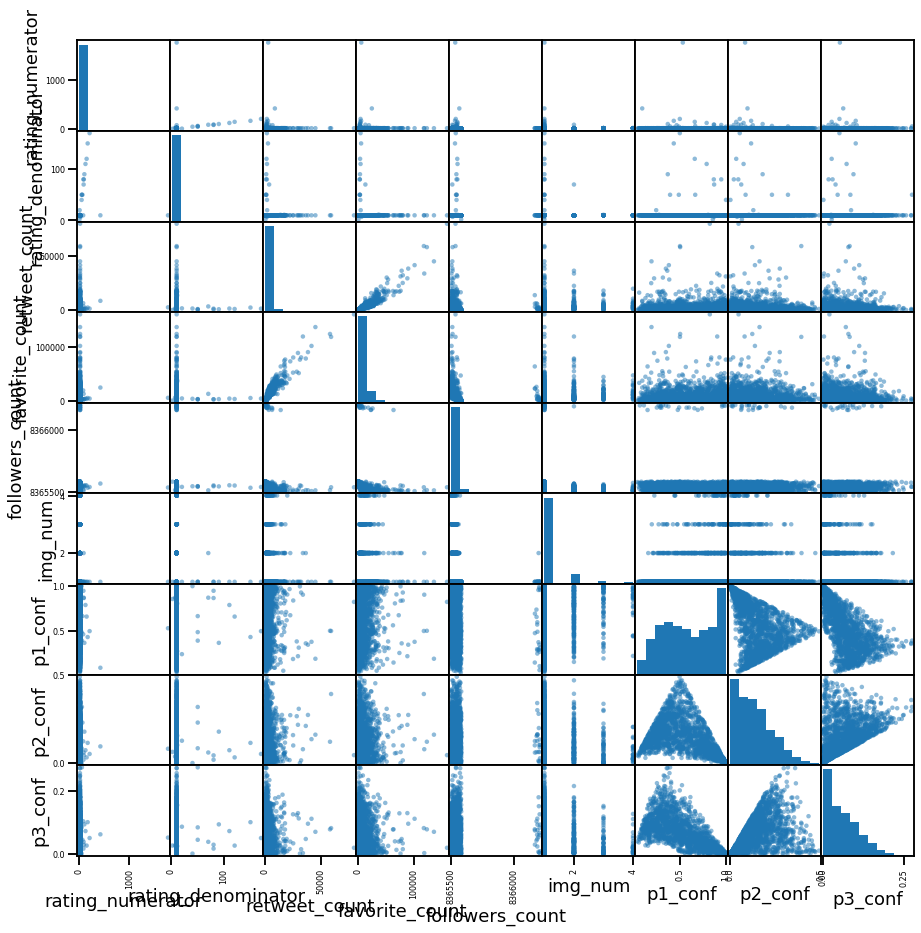

In [85]:
pd.plotting.scatter_matrix(table.iloc[:, 1:], figsize=(15, 15));

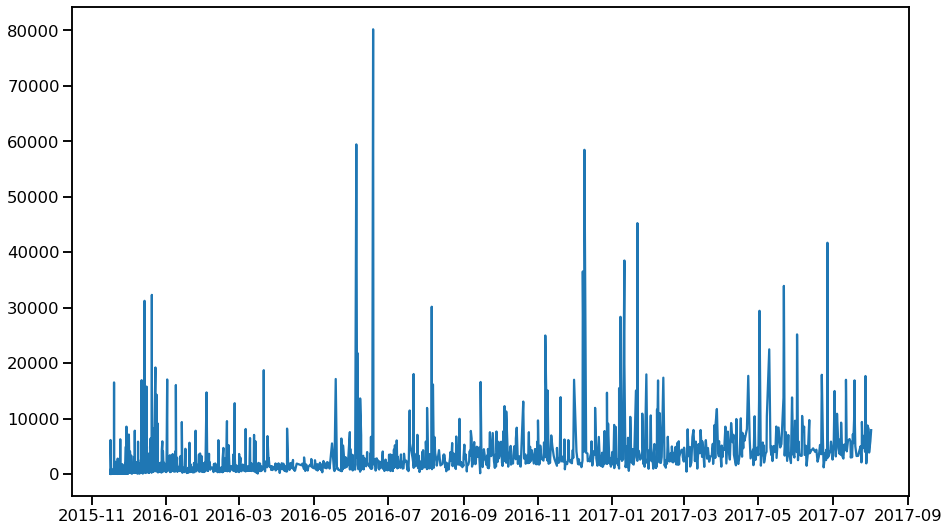

In [91]:
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(table.timestamp, table.retweet_count);

In [93]:
weekly_retweet = table.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]

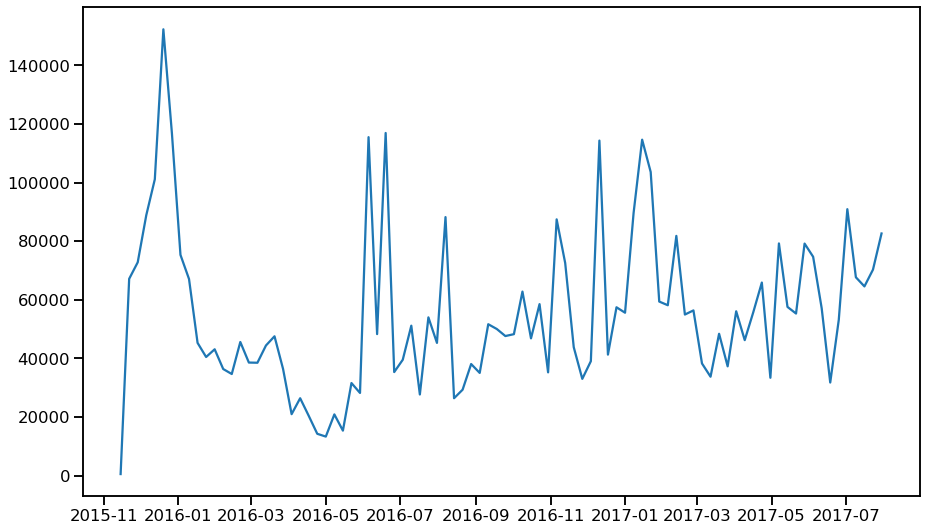

In [94]:
plt.subplots(figsize=(15, 9))
plt.plot(weekly_retweet.timestamp, weekly_retweet.retweet_count);

NameError: name 'weekly_favorite' is not defined

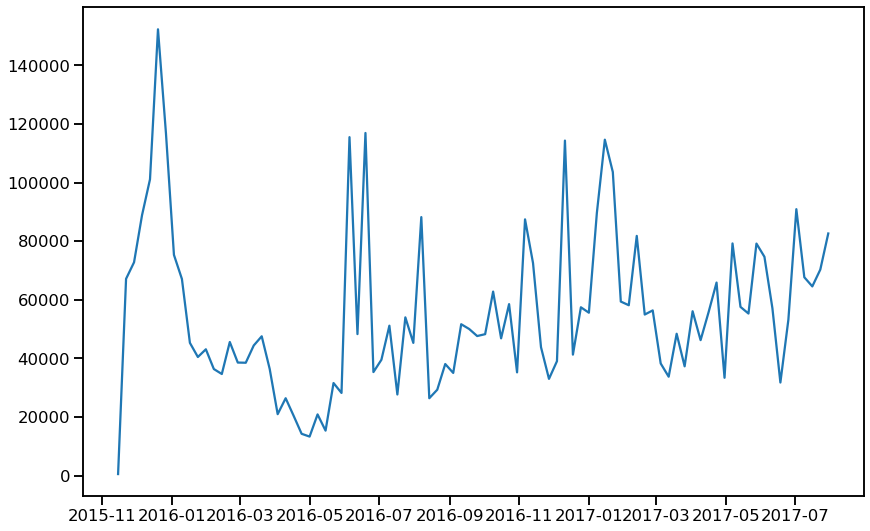

In [95]:
sns.set_context("talk")
plt.subplots(figsize=(14, 9))
plt.plot(weekly_retweet.timestamp, weekly_retweet.retweet_count, label="Weekly Retweets")
plt.plot(weekly_favorite.timestamp, weekly_favorite.favorite_count, label="Weekly Favorites")
plt.title('Their Love Increases\n', fontsize=18, weight='bold')
plt.xlabel('\nDate (YYYY-MM)', weight='bold')
plt.ylabel('Count\n', weight='bold')
plt.legend();
plt.savefig('love-increases.png')